In [234]:
# Импорт библиотек для анализа данных
import pandas as pd
# import numpy as np

In [235]:
# Загрузка данных
data = pd.read_csv('data/titanic_full_cleared.csv', header=0)

In [236]:
# Преобразование к int8
data = data.astype('int8')

In [237]:
# Настройки вывода
# Метод вывода для объекта pd.DataFrame
def _repr_html_styled_(self):
    styled_data = self.style.set_table_styles([
        {
            # Заголовки таблиц и индексы
            'selector': 'th', 
            'props': [
                ('font-family', 'Cascadia Code Light'),     # шрифт 
                ('font-weight', 'normal'),                  # толщина текста
                ('color', '#e5ce5c'),                       # цвет текста
                ('opacity', '1'),                           # прозрачность текста
                ('background-color', '#192d37'),            # цфет фона
                ('padding', '5px'),                         # отступы                
             ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#828f9a'),
            ]
        },
        {
            # Содержимое ячеек
            'selector': 'td', 
            'props': [
                ('font-family', 'Cascadia Code Light'), 
                ('padding', '5px')
            ]
        },
        {
            # Четные строки содержимого таблицы
            'selector': 'tbody tr:nth-child(even)', 
            'props': [
                ('background-color', '#ffffff00')  # нет цвета ("прозрачные")
            ]
        },
        {
            # Цвет фона для нечетных строк (начиная со строки заголовка)
            'selector': 'tr:nth-of-type(odd)', 
            'props': [
                ('background-color', '#ffffff0a')
            ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#828f9a'),
            ]
        },
        {
            # Hover эффект для ячейки
            'selector': 'td:hover',
            'props': [
                ('background-color', '#ffffff14'),
            ]
        },
          
    ])

    return styled_data._repr_html_() # возврат HTML-представления стилизованных данных


# Переопределение метода вывода объекта pd.DataFrame
pd.DataFrame._repr_html_ = _repr_html_styled_

In [238]:
# Полный набор данных
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,PersonsInTicket,Cost,FamilySize,IsAlone
0,0,3,0,2,1,0,1,1,1,1,7,2,0
1,1,1,1,3,1,0,4,2,4,2,2,2,0
2,1,3,1,2,0,0,1,1,2,1,8,1,1
3,1,1,1,3,1,0,4,1,4,2,1,2,0
4,0,3,0,3,0,0,1,1,1,1,8,1,1


In [239]:
# Перемешиваем данные
# data = data.sample(frac=1).reset_index(drop=True)

In [240]:
# Удаление признаков которые негативно отразились на результатах предсказания
X = data.drop(['SibSp', 'Parch', 'Fare', 'PersonsInTicket', 'FamilySize', 'IsAlone', 'Cost', 'Sex', 'Age'], axis = 1)

In [241]:
# Окончательный набор данных для обучения
X.head()

,Survived,Pclass,Embarked,Title
0,0,3,1,1
1,1,1,2,4
2,1,3,1,2
3,1,1,1,4
4,0,3,1,1


In [242]:
# Разделяем данные на обучающий и тестовый наборы
train = X.iloc[:891].reset_index(drop=True)
test = X.iloc[891:].reset_index(drop=True)

In [243]:
# Тренировочный набор данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int8 
 1   Pclass    891 non-null    int8 
 2   Embarked  891 non-null    int8 
 3   Title     891 non-null    int8 
dtypes: int8(4)
memory usage: 3.6 KB


In [244]:
# Тестовый набор данных
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int8 
 1   Pclass    418 non-null    int8 
 2   Embarked  418 non-null    int8 
 3   Title     418 non-null    int8 
dtypes: int8(4)
memory usage: 1.8 KB


In [245]:
# Импорт библиотек для машинного обучения
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score

In [246]:
# Сравнение классификаторов
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [247]:

# Создание DataFrame для хранения результатов работы моделей на тренировочных данных
train_log_cols = ['Classifier', 'Accuracy', 'Precision']
train_log = pd.DataFrame(columns=train_log_cols)

# Определение тренировочной выборки X_train и вектора целевых значений y_train
X_train = train.drop('Survived', axis=1)    # удаляем столбец Survived из тренировочных данных
y_train = train['Survived']                 # используем столбец Survived как вектор целевых значений

# Цикл перебора классификаторов и оценка их точности с использованием cross_val_score
for clf in classifiers:
    name = clf.__class__.__name__
    accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision').mean()
    train_log_entry = pd.DataFrame([[name, accuracy, precision]], columns=train_log_cols)
    train_log = pd.concat([train_log, train_log_entry], ignore_index=True)

In [248]:
# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# Установка стиля seaborn
sns.set_theme(style="darkgrid", rc={"figure.facecolor": "#eaeaf2"})

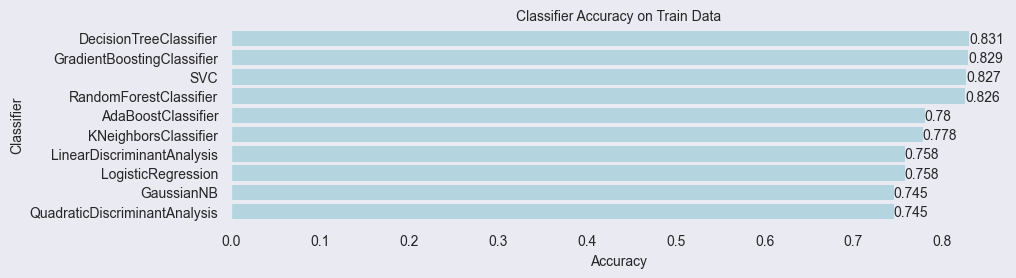

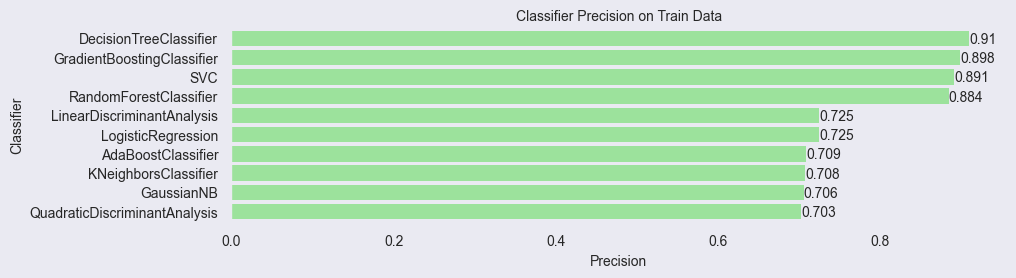

In [250]:
# Диаграммы доли правильных/точности классификаторов на тренировочных данных

# Сортировка данных по убыванию столбца Accuracy
train_log = train_log.sort_values(by='Accuracy', ascending=False)

# Диаграмма доли правильных
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Accuracy', y='Classifier', data=train_log, color='lightblue', linewidth=0)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Accuracy on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения доли правильных ответов в каждый столбец
for index, value in enumerate(train_log['Accuracy']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)

# Сортировка данных по убыванию столбца Precision
train_log = train_log.sort_values(by='Precision', ascending=False)

# Диаграмма точности
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Precision', y='Classifier', data=train_log, color='lightgreen', linewidth=0)
plt.xlabel('Precision', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Precision on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения точности в каждый столбец
for index, value in enumerate(train_log['Precision']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)

In [251]:
# Создание DataFrame для хранения результатов работы моделей на тестовых данных
test_log_cols = ['Classifier', 'Accuracy', 'Precision']
test_log = pd.DataFrame(columns=test_log_cols)

# Определение тренировочной выборки X_train и вектора целевых значений y_train
X_test = test.drop('Survived', axis=1)    # удаляем столбец Survived из тренировочных данных
y_test = test['Survived']                 # используем столбец Survived как вектор целевых значений

# Цикл перебора классификаторов и оценка их точности с использованием cross_val_score
for clf in classifiers:
    name = clf.__class__.__name__
    accuracy = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_test, y_test, cv=10, scoring='precision').mean()
    test_log_entry = pd.DataFrame([[name, accuracy, precision]], columns=test_log_cols)
    test_log = pd.concat([test_log, test_log_entry], ignore_index=True)

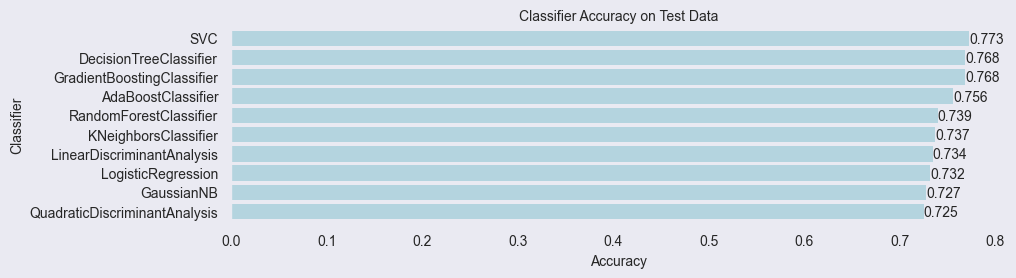

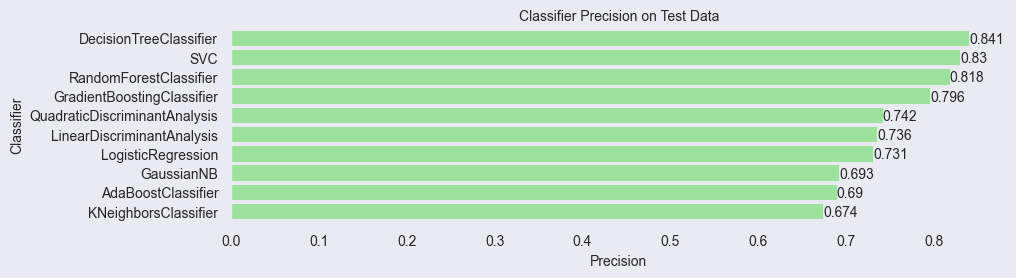

In [252]:
# Диаграммы доли правильных/точности классификаторов на тестовых данных

# Сортировка данных по убыванию столбца Accuracy
test_log = test_log.sort_values(by='Accuracy', ascending=False)

# Диаграмма доли правильных
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Accuracy', y='Classifier', data=test_log, color='lightblue', linewidth=0)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Accuracy on Test Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения доли правильных ответов в каждый столбец
for index, value in enumerate(test_log['Accuracy']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)

# Сортировка данных по убыванию столбца Precision
test_log = test_log.sort_values(by='Precision', ascending=False)

# Диаграмма точности
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Precision', y='Classifier', data=test_log, color='lightgreen', linewidth=0)
plt.xlabel('Precision', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Precision on Test Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения точности в каждый столбец
for index, value in enumerate(test_log['Precision']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)